<a href="https://colab.research.google.com/github/CarolineOlive/Challenge_DataScience/blob/main/Challenge_Data_Science_Alura_Voz_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b>Challenge Data Science 1 (2022)</b>



Autora: Caroline Silva de Oliveira

E-mail: krolzinhaoliver@gmail.com

LinkedIn: www.linkedin.com/in/caroline-oliveira-quim

Github: 

<b>Contextualização e Objetivo</b>

A operadora de telecomunicações Alura Voz necessita de uma análise para a área de vendas da empresa, com o objetivo de reduzir a <i>Taxa de Evasão de Clientes</i>, conhecido como <i><b>Churn Rate</b></i> (taxa de saída dos clientes). Basicamente, o Churn Rate indica o quanto a empresa perdeu de receita ou clientes em um período de tempo.

Inicialmente é necessário fazer a idenficação de clientes que teriam uma maior chance de deixar a empresa investigando algumas características de clientes ou dos planos de clientes para tentar classificar estas pessoas como potenciais candidatas a deixar a empresa ou não.

<b>Dados</b>

O conjunto de dados disponibilizado via API foi tratado com foco na otimização de cada um dos modelos com a finalidade de obter o melhor resultado para a tomada de decisão da Alura Voz.

dados: https://raw.githubusercontent.com/sthemonica/alura-voz/main/Dados/Telco-Customer-Churn.json

Uma forma de pré-visualizar os dados contidos em uma json é utilizar a ferramenta online [Code Beautify](https://codebeautify.org/jsonviewer). Por meio dela é possível visualizar os níveis contidos no JSON.

A base de dados possui o número de identificação do cliente e se o cliente deixou ou não a empresa, e ainda, informações sobre:

* Cliente:
  * gender: gênero (masculino e feminino)
  * SeniorCitizen: informação sobre um cliente ter ou não idade igual ou maior que 65 anos
  * Partner: se o cliente possui ou não um parceiro ou parceira
  * Dependents: se o cliente possui ou não dependentes
* Serviço de telefonia
  * tenure: meses de contrato do cliente
  * PhoneService: assinatura de serviço telefônico
  * MultipleLines: assisnatura de mais de uma linha de telefone
* Serviço de internet
  * InternetService: assinatura de um provedor internet
  * OnlineSecurity: assinatura adicional de segurança online
  * OnlineBackup: assinatura adicional de backup online
  * DeviceProtection: assinatura adicional de proteção no dispositivo
  * TechSupport: assinatura adicional de suporte técnico, menos tempo de espera
  * StreamingTV: assinatura de TV a cabo
  * StreamingMovies: assinatura de streaming de filmes
* Contrato
  * Contract: tipo de contrato
  * PaperlessBilling: se o cliente prefere receber online a fatura
  * PaymentMethod: forma de pagamento
  * Charges.Monthly: total de todos os serviços do cliente por mês
  * Charges.Total: total gasto pelo cliente

<b>Etapas | Resumo</b>


## Bibliotecas

In [1]:
import pandas as pd
import numpy as np

## Dados

In [2]:
#Importando os dados
uri = 'https://raw.githubusercontent.com/sthemonica/alura-voz/main/Dados/Telco-Customer-Churn.json'
dados = pd.read_json(uri)
dados.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [3]:
linha, coluna = dados.shape
print(f'O conjunto de dados possui informações de {linha} clientes e {coluna} variáveis.')

O conjunto de dados possui informações de 7267 clientes e 6 variáveis.


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


As variáveis 'customer', 'phone', 'internet' e 'account' apresentam dados em formato JSON. Estes dados precisam ser extraídos para acessar todos os dados dos clientes.
* Abrindo os JSON's dentro das colunas

In [5]:
# variável 'customer'
dados_customer = pd.json_normalize(data=dados.customer)
dados_customer

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
...,...,...,...,...,...
7262,Female,0,No,No,13
7263,Male,0,Yes,No,22
7264,Male,0,No,No,2
7265,Male,0,Yes,Yes,67


In [6]:
#variável 'phone'
dados_phone = pd.json_normalize(data=dados.phone)
dados_phone

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No
...,...,...
7262,Yes,No
7263,Yes,Yes
7264,Yes,No
7265,Yes,No


In [7]:
#variável 'internet'
dados_internet = pd.json_normalize(data=dados.internet)
dados_internet

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No
...,...,...,...,...,...,...,...
7262,DSL,Yes,No,No,Yes,No,No
7263,Fiber optic,No,No,No,No,No,Yes
7264,DSL,No,Yes,No,No,No,No
7265,DSL,Yes,No,Yes,Yes,No,Yes


In [8]:
#variável 'account'
dados_account = pd.json_normalize(data=dados.account)
dados_account

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.60,593.3
1,Month-to-month,No,Mailed check,59.90,542.4
2,Month-to-month,Yes,Electronic check,73.90,280.85
3,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...
7262,One year,No,Mailed check,55.15,742.9
7263,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,Month-to-month,Yes,Mailed check,50.30,92.75
7265,Two year,No,Mailed check,67.85,4627.65


In [9]:
#removendo as colunas com json
dados.drop(columns=['customer', 'phone', 'internet', 'account'], axis=1, inplace=True)

In [10]:
#contatenando os dados abertos
dados_abertos = pd.concat([dados, dados_customer, dados_phone, dados_internet, dados_account], axis=1)
dados_abertos

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


### Dados abertos

In [11]:
linha, coluna = dados_abertos.shape
print(f'O conjunto de dados possui informações de {linha} clientes e {coluna} variáveis.')

O conjunto de dados possui informações de 7267 clientes e 21 variáveis.


In [12]:
dados_abertos.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

* Renomeando as colunas

In [13]:
colunas = {'customerID':'id_cliente', 'Churn':'saida_cliente', 'gender':'genero', 
           'SeniorCitizen':'idoso', 'Partner':'parceiro', 
           'Dependents':'dependentes', 'tenure':'meses_contrato',
           'PhoneService':'servico_telefonia', 'MultipleLines':'varias_linhas_telefonicas', 
           'InternetService':'provedor_internet', 'OnlineSecurity':'seguranca_online', 
           'OnlineBackup':'backup_online', 'DeviceProtection': 'protecao_de_dispositivo', 
           'TechSupport':'Suporte_tecnico', 'StreamingTV':'TV_a_cabo', 'StreamingMovies':'streaming_filmes', 
           'Contract':'tipo_contrato', 'PaperlessBilling':'fatura_digital', 'PaymentMethod':'metodo_pagamento',
           'Charges.Monthly':'cobrancas_Mensais', 'Charges.Total':'total_cobrancas'}

In [14]:
dados_abertos.rename(columns=colunas, inplace=True)

In [15]:
dados_abertos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_cliente                 7267 non-null   object 
 1   saida_cliente              7267 non-null   object 
 2   genero                     7267 non-null   object 
 3   idoso                      7267 non-null   int64  
 4   parceiro                   7267 non-null   object 
 5   dependentes                7267 non-null   object 
 6   meses_contrato             7267 non-null   int64  
 7   servico_telefonia          7267 non-null   object 
 8   varias_linhas_telefonicas  7267 non-null   object 
 9   provedor_internet          7267 non-null   object 
 10  seguranca_online           7267 non-null   object 
 11  backup_online              7267 non-null   object 
 12  protecao_de_dispositivo    7267 non-null   object 
 13  Suporte_tecnico            7267 non-null   objec

* <b>Tipos de dados</b>
  * Quantitativa
    * discreta
      * meses_contrato
    * Contínua
      * cobrancas_Mensais
      * total_cobrancas 
  * Qualitativa / categórica
    * Nominal
      * id_cliente 
      * saida_cliente 
      * genero
      * parceiro
      * dependentes
      * servico_telefonia
    * Ordinal / categórica
      


### Tratando os dados

In [16]:
dados_abertos.head()

,id_cliente,saida_cliente,genero,idoso,parceiro,dependentes,meses_contrato,servico_telefonia,varias_linhas_telefonicas,provedor_internet,...,backup_online,protecao_de_dispositivo,Suporte_tecnico,TV_a_cabo,streaming_filmes,tipo_contrato,fatura_digital,metodo_pagamento,cobrancas_Mensais,total_cobrancas
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [17]:
#veirificando se há dados nulos
dados_abertos.isnull().sum()

id_cliente                   0
saida_cliente                0
genero                       0
idoso                        0
parceiro                     0
dependentes                  0
meses_contrato               0
servico_telefonia            0
varias_linhas_telefonicas    0
provedor_internet            0
seguranca_online             0
backup_online                0
protecao_de_dispositivo      0
Suporte_tecnico              0
TV_a_cabo                    0
streaming_filmes             0
tipo_contrato                0
fatura_digital               0
metodo_pagamento             0
cobrancas_Mensais            0
total_cobrancas              0
dtype: int64

Ao tentar converter os dados da coluna total_cobranca de string para float, houve o erro seguinte:
```
dados_abertos['total_cobrancas'] = pd.to_numeric(dados_abertos['total_cobrancas'], downcast="float")
````
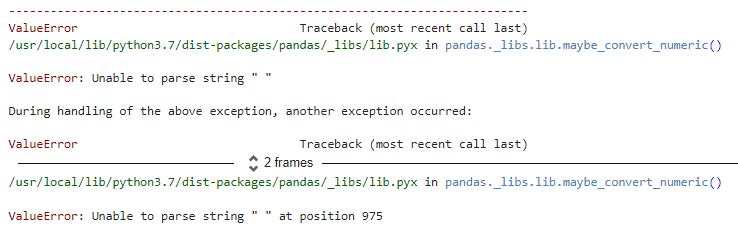

Assim, foi possível identificar a existência de dados vazios na coluna.
Os dados foram substituídos por zero, visto que os dados na coluna 'meses_contrato' é 0, indicando que nunhuma cobrança foi efetuada até o momento. 

In [18]:
#visualizando as celulas vazias
dados_abertos.query('total_cobrancas == " "')

,id_cliente,saida_cliente,genero,idoso,parceiro,dependentes,meses_contrato,servico_telefonia,varias_linhas_telefonicas,provedor_internet,...,backup_online,protecao_de_dispositivo,Suporte_tecnico,TV_a_cabo,streaming_filmes,tipo_contrato,fatura_digital,metodo_pagamento,cobrancas_Mensais,total_cobrancas
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


In [19]:
#substituindo dados vazios
dados_abertos['total_cobrancas'] = dados_abertos['total_cobrancas'].replace(" ", 0)

In [20]:
#convertendo string para float
dados_abertos['total_cobrancas'] = dados_abertos['total_cobrancas'].astype(float)

In [21]:
dados_abertos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_cliente                 7267 non-null   object 
 1   saida_cliente              7267 non-null   object 
 2   genero                     7267 non-null   object 
 3   idoso                      7267 non-null   int64  
 4   parceiro                   7267 non-null   object 
 5   dependentes                7267 non-null   object 
 6   meses_contrato             7267 non-null   int64  
 7   servico_telefonia          7267 non-null   object 
 8   varias_linhas_telefonicas  7267 non-null   object 
 9   provedor_internet          7267 non-null   object 
 10  seguranca_online           7267 non-null   object 
 11  backup_online              7267 non-null   object 
 12  protecao_de_dispositivo    7267 non-null   object 
 13  Suporte_tecnico            7267 non-null   objec

#### Verificando dados faltantes


In [22]:
dados_abertos.saida_cliente.unique()

array(['No', 'Yes', ''], dtype=object)

* coluna saida_cliente possui células com dados vazios.

In [23]:
#visualizando dados vazios
dados_abertos.query("saida_cliente == ''")

,id_cliente,saida_cliente,genero,idoso,parceiro,dependentes,meses_contrato,servico_telefonia,varias_linhas_telefonicas,provedor_internet,...,backup_online,protecao_de_dispositivo,Suporte_tecnico,TV_a_cabo,streaming_filmes,tipo_contrato,fatura_digital,metodo_pagamento,cobrancas_Mensais,total_cobrancas
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.30
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.10
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.20
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.20
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.90


In [24]:
#substituindo dados vazios 
dados_abertos.saida_cliente = dados_abertos.saida_cliente.replace('', 'No information')

* avaliando demais colunas

In [25]:
dados_abertos.saida_cliente.unique()

array(['No', 'Yes', 'No information'], dtype=object)

In [26]:
dados_abertos.genero.unique()

array(['Female', 'Male'], dtype=object)

In [27]:
dados_abertos.idoso.unique()

array([0, 1])

In [28]:
dados_abertos.parceiro.unique()

array(['Yes', 'No'], dtype=object)

In [29]:
dados_abertos.dependentes.unique()

array(['Yes', 'No'], dtype=object)

In [30]:
dados_abertos.servico_telefonia.unique()

array(['Yes', 'No'], dtype=object)

In [31]:
dados_abertos.varias_linhas_telefonicas.unique()

array(['No', 'Yes', 'No phone service'], dtype=object)

In [32]:
dados_abertos.seguranca_online.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [33]:
dados_abertos.backup_online.unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [34]:
dados_abertos.protecao_de_dispositivo.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [35]:
dados_abertos.Suporte_tecnico.unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [36]:
dados_abertos.TV_a_cabo.unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [37]:
dados_abertos.streaming_filmes.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [38]:
dados_abertos.fatura_digital.unique()

array(['Yes', 'No'], dtype=object)

In [39]:
dados_abertos.provedor_internet.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [40]:
dados_abertos.tipo_contrato.unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [41]:
dados_abertos.metodo_pagamento.unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

* Dados quantitativos

In [42]:
dados_abertos.meses_contrato.count()

7267

In [43]:
dados_abertos.cobrancas_Mensais.count()

7267

In [44]:
dados_abertos.total_cobrancas.count()

7267

#### conferindo valor total

O dataset original já trouxe a informação de gasto total dos clientes. No entanto, é importante conferir se os valores foram calculados corretamente. Para tal, uma nova coluna de gasto total calculado será criada usando os valores de cobrança mensal e quantidade de meses de contrato.

In [45]:
dados_abertos['total_cobrancas_calculado'] = dados_abertos['meses_contrato'] * dados_abertos['cobrancas_Mensais'] #calculando o gasto total do cliente
dados_abertos['diferença_cobranca'] = dados_abertos['total_cobrancas'] - dados_abertos['total_cobrancas_calculado'] #verificando a diferença entre os valores
dados_abertos.head()

,id_cliente,saida_cliente,genero,idoso,parceiro,dependentes,meses_contrato,servico_telefonia,varias_linhas_telefonicas,provedor_internet,...,Suporte_tecnico,TV_a_cabo,streaming_filmes,tipo_contrato,fatura_digital,metodo_pagamento,cobrancas_Mensais,total_cobrancas,total_cobrancas_calculado,diferença_cobranca
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,590.4,2.90
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,539.1,3.30
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,295.6,-14.75
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,1274.0,-36.15
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,251.7,15.70


* Gastos diários

In [46]:
dados_abertos['Gasto_diario'] = round(dados_abertos['cobrancas_Mensais'] / 30, 2) #calculando o gasto diário do cliente
dados_abertos.head()

,id_cliente,saida_cliente,genero,idoso,parceiro,dependentes,meses_contrato,servico_telefonia,varias_linhas_telefonicas,provedor_internet,...,TV_a_cabo,streaming_filmes,tipo_contrato,fatura_digital,metodo_pagamento,cobrancas_Mensais,total_cobrancas,total_cobrancas_calculado,diferença_cobranca,Gasto_diario
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,One year,Yes,Mailed check,65.6,593.30,590.4,2.90,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,539.1,3.30,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,295.6,-14.75,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,1274.0,-36.15,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,251.7,15.70,2.80


### Conclusões parciais

O dataset original possui informações de 7267 clientes e 6 variáveis. 4 dados 6 colunas de variáveis possuiam dados no formato json que foram abertos, abtendo-se assim, um novo dataset com 21 variáveis, sendo 3 variáveis quantitativas e 18 qualitativas/categóricas.

<b>Tratamentos</b>
* tradução dos rótulos das colunas
* células com dados vazios foram identificadas nas colunas 'saida_cliente' e 'total_cobrancas' e tratadas;
* os dados da coluna 'total_cobrancas' foram convertidos de str para float;
* os valores totais foram conferidos criando uma nova coluna de totais calculado('total_cobrancas_calculado') e calculada a diferença entre os dois valores ('diferença_cobranca');
* o gasto mensal dos clientes foi calculado

O dataset tratado possui 7267 clientes e 24 variáveis.

### Preparando os dados para modelagem

In [47]:
#criando uma base de dados para modelagem para converter os dados nominais em categorias numéricas
dados_abertos_modelagem = dados_abertos.copy()

In [48]:
dados_abertos_modelagem.head()

,id_cliente,saida_cliente,genero,idoso,parceiro,dependentes,meses_contrato,servico_telefonia,varias_linhas_telefonicas,provedor_internet,...,TV_a_cabo,streaming_filmes,tipo_contrato,fatura_digital,metodo_pagamento,cobrancas_Mensais,total_cobrancas,total_cobrancas_calculado,diferença_cobranca,Gasto_diario
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,One year,Yes,Mailed check,65.6,593.30,590.4,2.90,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,539.1,3.30,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,295.6,-14.75,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,1274.0,-36.15,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,251.7,15.70,2.80


<b> Transformando os dados em categóricos numéricos usando `pd.getdummies`</b>

In [49]:
dados_num = dados_abertos_modelagem[['id_cliente','meses_contrato', 'cobrancas_Mensais', 'total_cobrancas']]

In [50]:
dados_dummy = dados_abertos_modelagem.drop(columns=['id_cliente','meses_contrato', 'cobrancas_Mensais', 'total_cobrancas'])
dados_dummy.head()

,saida_cliente,genero,idoso,parceiro,dependentes,servico_telefonia,varias_linhas_telefonicas,provedor_internet,seguranca_online,backup_online,protecao_de_dispositivo,Suporte_tecnico,TV_a_cabo,streaming_filmes,tipo_contrato,fatura_digital,metodo_pagamento,total_cobrancas_calculado,diferença_cobranca,Gasto_diario
0,No,Female,0,Yes,Yes,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,590.4,2.90,2.19
1,No,Male,0,No,No,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,539.1,3.30,2.00
2,Yes,Male,0,No,No,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,295.6,-14.75,2.46
3,Yes,Male,1,Yes,No,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,1274.0,-36.15,3.27
4,Yes,Female,1,Yes,No,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,251.7,15.70,2.80


In [51]:
dados_dummy = pd.get_dummies(dados_dummy)
dados_dummy.head()

,idoso,total_cobrancas_calculado,diferença_cobranca,Gasto_diario,saida_cliente_No,saida_cliente_No information,saida_cliente_Yes,genero_Female,genero_Male,parceiro_No,...,streaming_filmes_Yes,tipo_contrato_Month-to-month,tipo_contrato_One year,tipo_contrato_Two year,fatura_digital_No,fatura_digital_Yes,metodo_pagamento_Bank transfer (automatic),metodo_pagamento_Credit card (automatic),metodo_pagamento_Electronic check,metodo_pagamento_Mailed check
0,0,590.4,2.90,2.19,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
1,0,539.1,3.30,2.00,1,0,0,0,1,1,...,1,1,0,0,1,0,0,0,0,1
2,0,295.6,-14.75,2.46,0,0,1,0,1,1,...,0,1,0,0,0,1,0,0,1,0
3,1,1274.0,-36.15,3.27,0,0,1,0,1,0,...,1,1,0,0,0,1,0,0,1,0
4,1,251.7,15.70,2.80,0,0,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1


In [52]:
dados_model = pd.concat([dados_num, dados_dummy], axis=1)

In [53]:
dados_model.head()

,id_cliente,meses_contrato,cobrancas_Mensais,total_cobrancas,idoso,total_cobrancas_calculado,diferença_cobranca,Gasto_diario,saida_cliente_No,saida_cliente_No information,...,streaming_filmes_Yes,tipo_contrato_Month-to-month,tipo_contrato_One year,tipo_contrato_Two year,fatura_digital_No,fatura_digital_Yes,metodo_pagamento_Bank transfer (automatic),metodo_pagamento_Credit card (automatic),metodo_pagamento_Electronic check,metodo_pagamento_Mailed check
0,0002-ORFBO,9,65.6,593.30,0,590.4,2.90,2.19,1,0,...,0,0,1,0,0,1,0,0,0,1
1,0003-MKNFE,9,59.9,542.40,0,539.1,3.30,2.00,1,0,...,1,1,0,0,1,0,0,0,0,1
2,0004-TLHLJ,4,73.9,280.85,0,295.6,-14.75,2.46,0,0,...,0,1,0,0,0,1,0,0,1,0
3,0011-IGKFF,13,98.0,1237.85,1,1274.0,-36.15,3.27,0,0,...,1,1,0,0,0,1,0,0,1,0
4,0013-EXCHZ,3,83.9,267.40,1,251.7,15.70,2.80,0,0,...,0,1,0,0,0,1,0,0,0,1


<b> Transformando os dados em categóricos numéricos usando `.map()` e `.cat.codes`</b>

In [54]:
dados_abertos_modelagem2 = dados_abertos.copy()

In [55]:
provedor = {'DSL':2, 
            'Fiber optic':1, 
            'No': 0}
dados_abertos_modelagem2['provedor_internet'] = dados_abertos_modelagem2['provedor_internet'].map(provedor)

In [56]:
contrato = {'One year':12, 
            'Month-to-month':1, 
            'Two year':24}
dados_abertos_modelagem2['tipo_contrato_meses']=dados_abertos_modelagem2.tipo_contrato.map(contrato)

In [57]:
dados_abertos_modelagem2['tipo_contrato']=dados_abertos_modelagem2.tipo_contrato.astype("category").cat.codes

In [58]:
dados_abertos_modelagem2.metodo_pagamento = dados_abertos_modelagem2.metodo_pagamento.astype("category").cat.codes

In [59]:
dados_abertos_modelagem2.genero = dados_abertos_modelagem2.genero.astype("category").cat.codes

In [60]:
dados_abertos_modelagem2 = dados_abertos_modelagem2.replace("Yes", 1)
dados_abertos_modelagem2 = dados_abertos_modelagem2.replace("No", 0)
dados_abertos_modelagem2 = dados_abertos_modelagem2.replace("No internet service", 2)
dados_abertos_modelagem2 = dados_abertos_modelagem2.replace("No phone service", 2)
dados_abertos_modelagem2 = dados_abertos_modelagem2.replace("No information", 2)

In [61]:
dados_abertos_modelagem2

,id_cliente,saida_cliente,genero,idoso,parceiro,dependentes,meses_contrato,servico_telefonia,varias_linhas_telefonicas,provedor_internet,...,streaming_filmes,tipo_contrato,fatura_digital,metodo_pagamento,cobrancas_Mensais,total_cobrancas,total_cobrancas_calculado,diferença_cobranca,Gasto_diario,tipo_contrato_meses
0,0002-ORFBO,0,0,0,1,1,9,1,0,2,...,0,1,1,3,65.60,593.30,590.40,2.90,2.19,12
1,0003-MKNFE,0,1,0,0,0,9,1,1,2,...,1,0,0,3,59.90,542.40,539.10,3.30,2.00,1
2,0004-TLHLJ,1,1,0,0,0,4,1,0,1,...,0,0,1,2,73.90,280.85,295.60,-14.75,2.46,1
3,0011-IGKFF,1,1,1,1,0,13,1,0,1,...,1,0,1,2,98.00,1237.85,1274.00,-36.15,3.27,1
4,0013-EXCHZ,1,0,1,1,0,3,1,0,1,...,0,0,1,3,83.90,267.40,251.70,15.70,2.80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,0,0,0,0,13,1,0,2,...,0,1,0,3,55.15,742.90,716.95,25.95,1.84,12
7263,9992-RRAMN,1,1,0,1,0,22,1,1,1,...,1,0,1,2,85.10,1873.70,1872.20,1.50,2.84,1
7264,9992-UJOEL,0,1,0,0,0,2,1,0,2,...,0,0,1,3,50.30,92.75,100.60,-7.85,1.68,1
7265,9993-LHIEB,0,1,0,1,1,67,1,0,2,...,1,2,0,3,67.85,4627.65,4545.95,81.70,2.26,24
